In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from model import print_results

In [2]:
class MonoexponentialModel(tf.keras.Model):
    def __init__(self, 
                 filling_pulse=20 * 10 ** (-6), 
                 time_constant=0.01,
                 amplitude=1.0,
                 M=5.861, 
                 **kwargs):
        
        super().__init__(**kwargs)            
        
        self.filling_pulse = tf.Variable(filling_pulse, trainable=False)
        self.M = tf.Variable(M, trainable=False)
        
        self.time_constant = tf.Variable(time_constant)
        self.amplitude = tf.Variable(amplitude)
        
    def call(self, frequency):
        
        exp0 = tf.exp(-0.05 / (self.time_constant * frequency))
        exp1 = tf.exp((self.filling_pulse * frequency - 0.45) / (self.time_constant * frequency))
        exp2 = tf.exp(-0.5 / (self.time_constant * frequency))
        exp3 = tf.exp((self.filling_pulse * frequency - 0.95) / (self.time_constant * frequency))
        
        phi = self.time_constant * frequency * exp0 * (1.0 - exp1 - exp2 + exp3)
        
        dlts = self.amplitude * self.M * phi
        
        return dlts

In [3]:
filling_pulse=20 * 10 ** (-6)

powers = tf.linspace(0, np.log10(2500), 1000)
frequency = tf.pow(10, powers)

# The actual parameters
fs_model = MonoexponentialModel(filling_pulse=filling_pulse,
                                time_constant=0.2,
                                amplitude=2.0
                                )

noise = tf.random.normal(stddev=0.1, shape=[frequency.shape[0]])

actual_dlts = fs_model(frequency) + noise

Initial values:
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.0588
RMSE = 1.028977


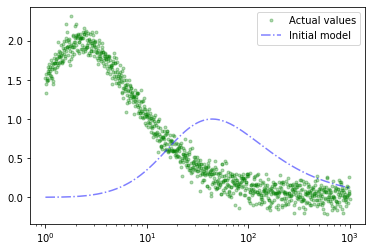

In [4]:
initial_model = MonoexponentialModel(filling_pulse=20 * 10 ** (-6))

print_results(frequency = frequency, 
              actual_dlts = actual_dlts,
              initial_model = initial_model)

In [5]:
final_model = MonoexponentialModel()

final_model.compile(run_eagerly=False,
                 loss=tf.keras.losses.MSE,
                 optimizer=tf.optimizers.Adamax(learning_rate=0.01))

history = final_model.fit(frequency, actual_dlts, epochs=600, batch_size=100, verbose=True)

Epoch 1/600
10/10 [==============================] - 0s 779us/step - loss: 0.6076
Epoch 2/600
10/10 [==============================] - 0s 890us/step - loss: 0.3269
Epoch 3/600
10/10 [==============================] - 0s 889us/step - loss: 0.2533
Epoch 4/600
10/10 [==============================] - 0s 669us/step - loss: 0.2056
Epoch 5/600
10/10 [==============================] - 0s 889us/step - loss: 0.1678
Epoch 6/600
10/10 [==============================] - 0s 890us/step - loss: 0.1385
Epoch 7/600
10/10 [==============================] - 0s 668us/step - loss: 0.1142
Epoch 8/600
10/10 [==============================] - 0s 890us/step - loss: 0.0949
Epoch 9/600
10/10 [==============================] - 0s 889us/step - loss: 0.0789
Epoch 10/600
10/10 [==============================] - 0s 779us/step - loss: 0.0661
Epoch 11/600
10/10 [==============================] - 0s 888us/step - loss: 0.0556
Epoch 12/600
10/10 [==============================] - 0s 891us/step - loss: 0.0472
Epoch 13/600


10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 100/600
10/10 [==============================] - 0s 889us/step - loss: 0.0100
Epoch 101/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 102/600
10/10 [==============================] - 0s 890us/step - loss: 0.0100
Epoch 103/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 104/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 105/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 106/600
10/10 [==============================] - 0s 667us/step - loss: 0.0100
Epoch 107/600
10/10 [==============================] - 0s 667us/step - loss: 0.0100
Epoch 108/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 109/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 110/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 

10/10 [==============================] - 0s 666us/step - loss: 0.0100
Epoch 197/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 198/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 199/600
10/10 [==============================] - 0s 887us/step - loss: 0.0100
Epoch 200/600
10/10 [==============================] - 0s 776us/step - loss: 0.0100
Epoch 201/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 202/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 203/600
10/10 [==============================] - 0s 780us/step - loss: 0.0100
Epoch 204/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 205/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 206/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 207/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 

10/10 [==============================] - 0s 776us/step - loss: 0.0100
Epoch 294/600
10/10 [==============================] - 0s 889us/step - loss: 0.0100
Epoch 295/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 296/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 297/600
10/10 [==============================] - 0s 667us/step - loss: 0.0100
Epoch 298/600
10/10 [==============================] - 0s 889us/step - loss: 0.0100
Epoch 299/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 300/600
10/10 [==============================] - 0s 888us/step - loss: 0.0100
Epoch 301/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 302/600
10/10 [==============================] - 0s 668us/step - loss: 0.0100
Epoch 303/600
10/10 [==============================] - 0s 668us/step - loss: 0.0100
Epoch 304/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 

10/10 [==============================] - 0s 890us/step - loss: 0.0100
Epoch 391/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 392/600
10/10 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 393/600
10/10 [==============================] - 0s 890us/step - loss: 0.0100
Epoch 394/600
10/10 [==============================] - 0s 667us/step - loss: 0.0100
Epoch 395/600
10/10 [==============================] - 0s 890us/step - loss: 0.0100
Epoch 396/600
10/10 [==============================] - 0s 889us/step - loss: 0.0100
Epoch 397/600
10/10 [==============================] - 0s 668us/step - loss: 0.0100
Epoch 398/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 399/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 400/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 401/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 40

10/10 [==============================] - 0s 776us/step - loss: 0.0100
Epoch 488/600
10/10 [==============================] - 0s 776us/step - loss: 0.0100
Epoch 489/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 490/600
10/10 [==============================] - 0s 668us/step - loss: 0.0100
Epoch 491/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 492/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 493/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 494/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 495/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 496/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 497/600
10/10 [==============================] - 0s 666us/step - loss: 0.0100
Epoch 498/600
10/10 [==============================] - 0s 668us/step - loss: 0.0100
Epoch 

10/10 [==============================] - 0s 668us/step - loss: 0.0100
Epoch 585/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 586/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 587/600
10/10 [==============================] - 0s 779us/step - loss: 0.0100
Epoch 588/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 589/600
10/10 [==============================] - 0s 667us/step - loss: 0.0100
Epoch 590/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 591/600
10/10 [==============================] - 0s 777us/step - loss: 0.0100
Epoch 592/600
10/10 [==============================] - 0s 665us/step - loss: 0.0100
Epoch 593/600
10/10 [==============================] - 0s 779us/step - loss: 0.0101
Epoch 594/600
10/10 [==============================] - 0s 776us/step - loss: 0.0100
Epoch 595/600
10/10 [==============================] - 0s 778us/step - loss: 0.0100
Epoch 

Initial values:
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.0588
RMSE = 1.028977

Final values:
Time constant = 0.1999 s
Amplitude = 1.9951 pf
MSE = 0.0100
RMSE = 0.100030


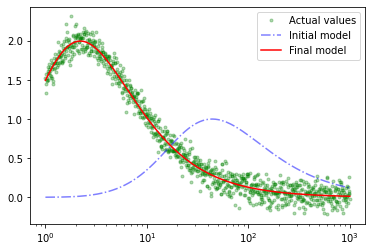

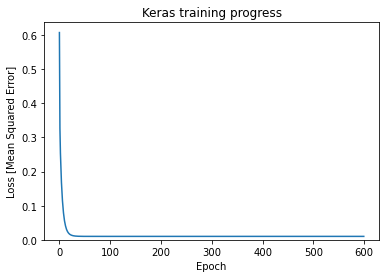

In [6]:
print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

In [7]:
final_model = MonoexponentialModel()

final_model.compile(run_eagerly=False,
                 loss=tf.keras.losses.MSE,
                 optimizer=tf.optimizers.Adagrad(learning_rate=0.01))

history = final_model.fit(frequency, actual_dlts, epochs=600, batch_size=100, verbose=True)

Epoch 1/600
10/10 [==============================] - 0s 871us/step - loss: 0.7031
Epoch 2/600
10/10 [==============================] - 0s 888us/step - loss: 0.4813
Epoch 3/600
10/10 [==============================] - 0s 667us/step - loss: 0.4020
Epoch 4/600
10/10 [==============================] - 0s 778us/step - loss: 0.3538
Epoch 5/600
10/10 [==============================] - 0s 779us/step - loss: 0.3203
Epoch 6/600
10/10 [==============================] - 0s 779us/step - loss: 0.2951
Epoch 7/600
10/10 [==============================] - 0s 778us/step - loss: 0.2752
Epoch 8/600
10/10 [==============================] - 0s 889us/step - loss: 0.2589
Epoch 9/600
10/10 [==============================] - 0s 776us/step - loss: 0.2452
Epoch 10/600
10/10 [==============================] - 0s 778us/step - loss: 0.2335
Epoch 11/600
10/10 [==============================] - 0s 890us/step - loss: 0.2233
Epoch 12/600
10/10 [==============================] - 0s 778us/step - loss: 0.2143
Epoch 13/600


Epoch 100/600
10/10 [==============================] - 0s 778us/step - loss: 0.0589
Epoch 101/600
10/10 [==============================] - 0s 779us/step - loss: 0.0584
Epoch 102/600
10/10 [==============================] - 0s 778us/step - loss: 0.0579
Epoch 103/600
10/10 [==============================] - 0s 778us/step - loss: 0.0574
Epoch 104/600
10/10 [==============================] - 0s 887us/step - loss: 0.0568
Epoch 105/600
10/10 [==============================] - 0s 891us/step - loss: 0.0564
Epoch 106/600
10/10 [==============================] - 0s 669us/step - loss: 0.0559
Epoch 107/600
10/10 [==============================] - 0s 889us/step - loss: 0.0554
Epoch 108/600
10/10 [==============================] - 0s 999us/step - loss: 0.0549
Epoch 109/600
10/10 [==============================] - 0s 778us/step - loss: 0.0544
Epoch 110/600
10/10 [==============================] - 0s 1000us/step - loss: 0.0540
Epoch 111/600
10/10 [==============================] - 0s 780us/step - loss

10/10 [==============================] - 0s 779us/step - loss: 0.0290
Epoch 198/600
10/10 [==============================] - 0s 669us/step - loss: 0.0289
Epoch 199/600
10/10 [==============================] - 0s 889us/step - loss: 0.0287
Epoch 200/600
10/10 [==============================] - 0s 779us/step - loss: 0.0285
Epoch 201/600
10/10 [==============================] - 0s 666us/step - loss: 0.0284
Epoch 202/600
10/10 [==============================] - 0s 889us/step - loss: 0.0282
Epoch 203/600
10/10 [==============================] - 0s 777us/step - loss: 0.0280
Epoch 204/600
10/10 [==============================] - 0s 667us/step - loss: 0.0279
Epoch 205/600
10/10 [==============================] - 0s 779us/step - loss: 0.0277
Epoch 206/600
10/10 [==============================] - 0s 888us/step - loss: 0.0276
Epoch 207/600
10/10 [==============================] - 0s 779us/step - loss: 0.0274
Epoch 208/600
10/10 [==============================] - 0s 776us/step - loss: 0.0273
Epoch 

10/10 [==============================] - 0s 889us/step - loss: 0.0182
Epoch 295/600
10/10 [==============================] - 0s 667us/step - loss: 0.0181
Epoch 296/600
10/10 [==============================] - 0s 778us/step - loss: 0.0180
Epoch 297/600
10/10 [==============================] - 0s 777us/step - loss: 0.0180
Epoch 298/600
10/10 [==============================] - 0s 779us/step - loss: 0.0179
Epoch 299/600
10/10 [==============================] - 0s 778us/step - loss: 0.0178
Epoch 300/600
10/10 [==============================] - 0s 777us/step - loss: 0.0178
Epoch 301/600
10/10 [==============================] - 0s 777us/step - loss: 0.0177
Epoch 302/600
10/10 [==============================] - 0s 777us/step - loss: 0.0176
Epoch 303/600
10/10 [==============================] - 0s 777us/step - loss: 0.0176
Epoch 304/600
10/10 [==============================] - 0s 889us/step - loss: 0.0175
Epoch 305/600
10/10 [==============================] - 0s 667us/step - loss: 0.0175
Epoch 

10/10 [==============================] - 0s 890us/step - loss: 0.0137
Epoch 392/600
10/10 [==============================] - 0s 778us/step - loss: 0.0136
Epoch 393/600
10/10 [==============================] - 0s 780us/step - loss: 0.0136
Epoch 394/600
10/10 [==============================] - 0s 889us/step - loss: 0.0136
Epoch 395/600
10/10 [==============================] - 0s 779us/step - loss: 0.0135
Epoch 396/600
10/10 [==============================] - 0s 780us/step - loss: 0.0135
Epoch 397/600
10/10 [==============================] - 0s 888us/step - loss: 0.0135
Epoch 398/600
10/10 [==============================] - 0s 889us/step - loss: 0.0135
Epoch 399/600
10/10 [==============================] - 0s 665us/step - loss: 0.0134
Epoch 400/600
10/10 [==============================] - 0s 889us/step - loss: 0.0134
Epoch 401/600
10/10 [==============================] - 0s 777us/step - loss: 0.0134
Epoch 402/600
10/10 [==============================] - 0s 778us/step - loss: 0.0133
Epoch 

10/10 [==============================] - 0s 667us/step - loss: 0.0117
Epoch 489/600
10/10 [==============================] - 0s 778us/step - loss: 0.0117
Epoch 490/600
10/10 [==============================] - 0s 778us/step - loss: 0.0116
Epoch 491/600
10/10 [==============================] - 0s 668us/step - loss: 0.0116
Epoch 492/600
10/10 [==============================] - 0s 667us/step - loss: 0.0116
Epoch 493/600
10/10 [==============================] - 0s 668us/step - loss: 0.0116
Epoch 494/600
10/10 [==============================] - 0s 666us/step - loss: 0.0116
Epoch 495/600
10/10 [==============================] - 0s 779us/step - loss: 0.0116
Epoch 496/600
10/10 [==============================] - 0s 779us/step - loss: 0.0116
Epoch 497/600
10/10 [==============================] - 0s 778us/step - loss: 0.0116
Epoch 498/600
10/10 [==============================] - 0s 888us/step - loss: 0.0115
Epoch 499/600
10/10 [==============================] - 0s 778us/step - loss: 0.0115
Epoch 

10/10 [==============================] - 0s 779us/step - loss: 0.0108
Epoch 586/600
10/10 [==============================] - 0s 666us/step - loss: 0.0108
Epoch 587/600
10/10 [==============================] - 0s 780us/step - loss: 0.0108
Epoch 588/600
10/10 [==============================] - 0s 666us/step - loss: 0.0108
Epoch 589/600
10/10 [==============================] - 0s 778us/step - loss: 0.0107
Epoch 590/600
10/10 [==============================] - 0s 776us/step - loss: 0.0107
Epoch 591/600
10/10 [==============================] - 0s 779us/step - loss: 0.0107
Epoch 592/600
10/10 [==============================] - 0s 666us/step - loss: 0.0107
Epoch 593/600
10/10 [==============================] - 0s 667us/step - loss: 0.0107
Epoch 594/600
10/10 [==============================] - 0s 777us/step - loss: 0.0107
Epoch 595/600
10/10 [==============================] - 0s 777us/step - loss: 0.0107
Epoch 596/600
10/10 [==============================] - 0s 779us/step - loss: 0.0107
Epoch 

Initial values:
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.0588
RMSE = 1.028977

Final values:
Time constant = 0.1942 s
Amplitude = 1.9425 pf
MSE = 0.0107
RMSE = 0.103339


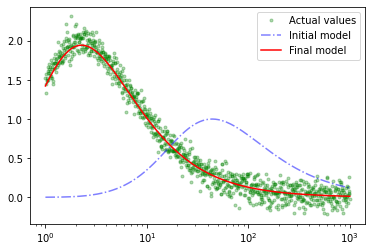

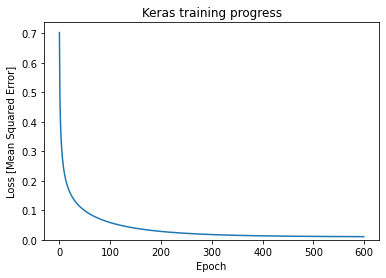

In [8]:
print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )